# Import

In [1]:
###importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Data understanding

## Reading the dataset (csv file) into Pandas dataframe

In [5]:
housing_file_path = "DataSet_LakasArak_labeled.csv"
housing = pd.DataFrame(pd.read_csv(housing_file_path))
house = housing.copy()

## Exploring the dataframe

In [7]:
# Check the head of the dataset
housing.head()

,county,city,postcode,property_type,property_subtype,property_condition_type,property_floor,building_floor_count,view_type,orientation,...,room_cnt,small_room_cnt,created_at,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr,split
0,Budapest,Budapest XII.,NaN,flat,brick flat (for sale),good,1,NaN,street view,NaN,...,2.0,1.0,2015-02-09,65.0,0.0,23.5,605.0,119.0,4,test
1,Budapest,Budapest I.,1016.0,flat,brick flat (for sale),novel,2,NaN,street view,NaN,...,1.0,1.0,2015-02-09,45.0,0.0,20.0,49.0,25.0,12,train
2,Budapest,Budapest XVI.,1164.0,flat,brick flat (for sale),novel,1,NaN,garden view,NaN,...,2.0,1.0,2015-02-09,60.0,0.0,22.0,77.0,77.0,14,train
3,Budapest,Budapest X.,NaN,flat,brick flat (for sale),good,4,NaN,garden view,NaN,...,2.0,0.0,2015-02-09,55.0,4.0,11.0,139.0,18.0,21,train
4,Budapest,Budapest XVIII.,1181.0,flat,prefabricated panel flat (for sale),renewed,6,NaN,NaN,NaN,...,2.0,1.0,2015-02-09,60.0,3.0,10.2,176.0,69.0,31,test


In [9]:
housing.shape

(78539, 23)

In [11]:
# The dataset shape shows the number of instances and features in the dataset
num_instances = housing.shape[0]
num_features = housing.shape[1]

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78539 entries, 0 to 78538
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county                   78539 non-null  object 
 1   city                     77980 non-null  object 
 2   postcode                 49585 non-null  float64
 3   property_type            78539 non-null  object 
 4   property_subtype         76880 non-null  object 
 5   property_condition_type  78539 non-null  object 
 6   property_floor           74746 non-null  object 
 7   building_floor_count     36429 non-null  object 
 8   view_type                42878 non-null  object 
 9   orientation              47647 non-null  object 
 10  garden_access            17200 non-null  object 
 11  heating_type             67233 non-null  object 
 12  elevator_type            64388 non-null  object 
 13  room_cnt                 78539 non-null  float64
 14  small_room_cnt        

In [15]:
housing.describe()

,postcode,room_cnt,small_room_cnt,property_area,balcony_area,price_created_at,ad_view_cnt,active_days,nr
count,49585.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000
mean,1103.358980,1.467666,0.559875,48.440584,1.953182,19.341475,259.599320,44.173684,196334.093240
std,50.769326,0.599840,0.737015,12.716653,4.677227,8.900296,512.351553,47.821006,113305.083861
min,1011.000000,0.000000,0.000000,5.000000,0.000000,0.200000,0.000000,1.000000,4.000000
25%,1064.000000,1.000000,0.000000,40.000000,0.000000,13.200000,42.000000,11.000000,97959.000000
50%,1101.000000,1.000000,0.000000,50.000000,0.000000,16.900000,103.000000,28.000000,196095.000000
75%,1142.000000,2.000000,1.000000,60.000000,3.000000,23.900000,263.000000,61.000000,294516.500000
max,1239.000000,7.000000,4.000000,70.000000,97.000000,99.600000,28096.000000,537.000000,394181.000000


In [17]:
num_instances=house.shape[0]
num_na_instances=house.isnull().sum()
print((num_na_instances/num_instances)*100)

county                      0.000000
city                        0.711748
postcode                   36.865761
property_type               0.000000
property_subtype            2.112326
property_condition_type     0.000000
property_floor              4.829448
building_floor_count       53.616675
view_type                  45.405467
orientation                39.333325
garden_access              78.100052
heating_type               14.395396
elevator_type              18.017800
room_cnt                    0.000000
small_room_cnt              0.000000
created_at                  0.000000
property_area               0.000000
balcony_area                0.000000
price_created_at            0.000000
ad_view_cnt                 0.000000
active_days                 0.000000
nr                          0.000000
split                       0.000000
dtype: float64


In [19]:
## Drop or remove nan values from columns 
house_clean= house.dropna()
print(house_clean.isnull().sum())

county                     0
city                       0
postcode                   0
property_type              0
property_subtype           0
property_condition_type    0
property_floor             0
building_floor_count       0
view_type                  0
orientation                0
garden_access              0
heating_type               0
elevator_type              0
room_cnt                   0
small_room_cnt             0
created_at                 0
property_area              0
balcony_area               0
price_created_at           0
ad_view_cnt                0
active_days                0
nr                         0
split                      0
dtype: int64


In [28]:
print(house_clean.shape)
## I lost a lot of data here that is why I would like to fill NAN with 0

house.fillna(0,inplace=True)
print(house.shape)
print(house.head())

(5682, 23)
(78539, 23)
     county             city  postcode property_type  \
0  Budapest    Budapest XII.       0.0          flat   
1  Budapest      Budapest I.    1016.0          flat   
2  Budapest    Budapest XVI.    1164.0          flat   
3  Budapest      Budapest X.       0.0          flat   
4  Budapest  Budapest XVIII.    1181.0          flat   

                      property_subtype property_condition_type property_floor  \
0                brick flat (for sale)                    good              1   
1                brick flat (for sale)                   novel              2   
2                brick flat (for sale)                   novel              1   
3                brick flat (for sale)                    good              4   
4  prefabricated panel flat (for sale)                 renewed              6   

  building_floor_count    view_type orientation  ... room_cnt small_room_cnt  \
0                    0  street view           0  ...      2.0            

## Features and ground truth labels

In [36]:
# One of the columns contains the prices. In this task, we need to predict the prices based on some information that we have; thus, this column is the ground truth label.
# 'price_created_at' column has the ground truth label that we are going to use in training and testing later.
gt_feature = 'price_created_at'
### Keep only numeric columns for the correlation matrix
house = house.select_dtypes(include=[float, int])
# Compute correlation matrix
correlation_matrix = house.corr()

# Select features with strong correlation with the target
correlation_with_target = correlation_matrix['price_created_at'].abs()  # Absolute correlation values
important_features = correlation_with_target[correlation_with_target > 0.1]  # Threshold of 0.2 for correlation
print(important_features)


room_cnt            0.292794
property_area       0.451649
balcony_area        0.227983
price_created_at    1.000000
nr                  0.193351
Name: price_created_at, dtype: float64


In [38]:
small_features = ['room_cnt','small_room_cnt','property_area']
target = 'price_created_at'
all_small_columns = small_features + [target]
print(all_small_columns)
housing_clean_small = house[all_small_columns]
housing_clean_small.shape

['room_cnt', 'small_room_cnt', 'property_area', 'price_created_at']


(78539, 4)

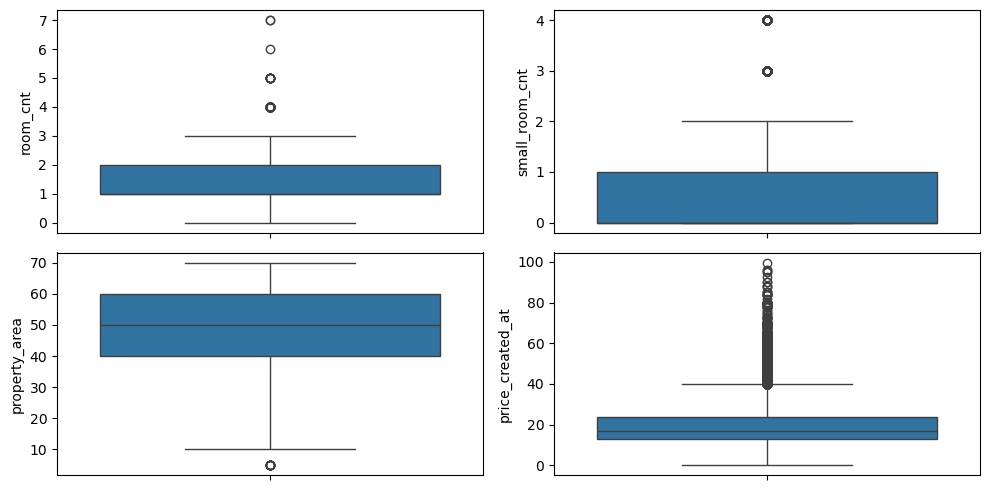

In [40]:
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(housing_clean_small['room_cnt'], ax = axs[0,0])
plt2 = sns.boxplot(housing_clean_small['small_room_cnt'], ax = axs[0,1])
plt1 = sns.boxplot(housing_clean_small['property_area'], ax = axs[1,0])
plt2 = sns.boxplot(housing_clean_small['price_created_at'], ax = axs[1,1])

plt.tight_layout()

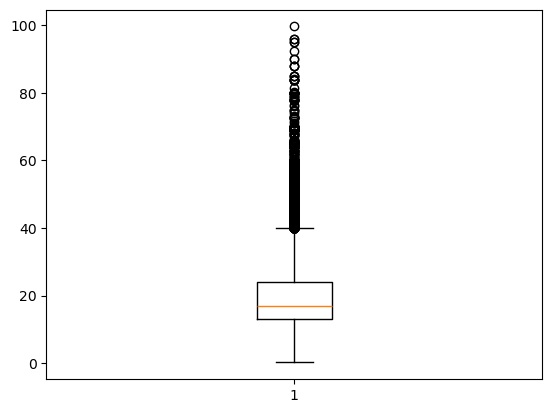

(76254, 4)


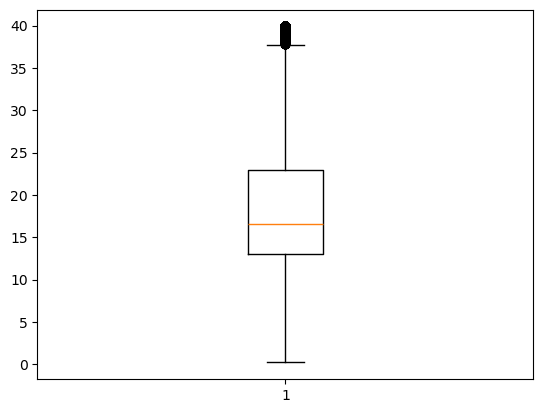

In [42]:
plt.boxplot(housing_clean_small.price_created_at)
plt.show()
Q1 = housing_clean_small.price_created_at.quantile(0.25)
Q3 = housing_clean_small.price_created_at.quantile(0.75)
IQR = Q3 - Q1
housing_clean_small = housing_clean_small[(housing_clean_small.price_created_at >= Q1 - 1.5*IQR) & (housing_clean_small.price_created_at <= Q3 + 1.5*IQR)]
print(housing_clean_small.shape)
plt.boxplot(housing_clean_small.price_created_at)
plt.show()

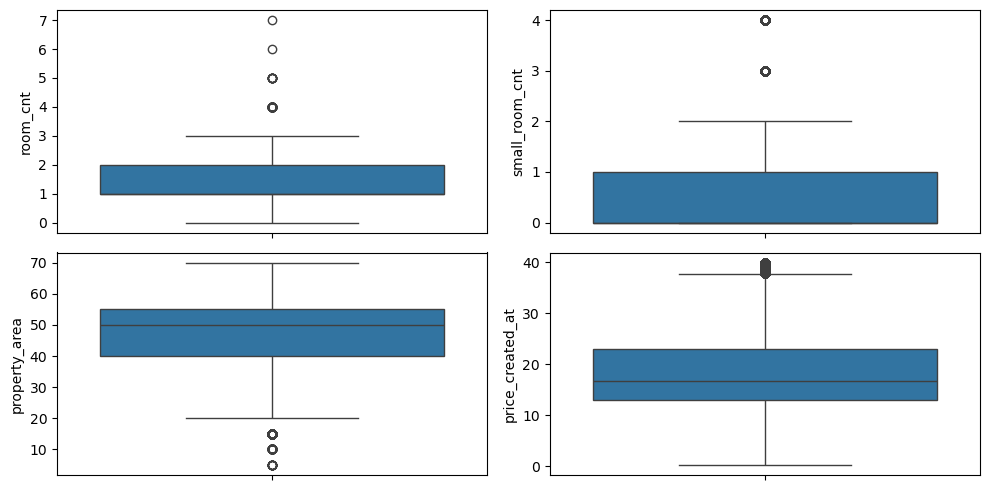

In [44]:
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(housing_clean_small['room_cnt'], ax = axs[0,0])
plt2 = sns.boxplot(housing_clean_small['small_room_cnt'], ax = axs[0,1])
plt1 = sns.boxplot(housing_clean_small['property_area'], ax = axs[1,0])
plt2 = sns.boxplot(housing_clean_small['price_created_at'], ax = axs[1,1])

plt.tight_layout()

In [46]:
## Scaling data using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
housing_clean_small[small_features] = scaler.fit_transform(housing_clean_small[small_features])

## Holding out a test set for performance evaluation

In [49]:
# 1- We need to decide how much of the data is used for testing.
#    In this experiment the data is labeled beforehand, we have 30% of the data for testing purposes.
# 2- How many instances do we have for training and testing?

train_set = housing[housing['split']=='train']
test_set = housing[housing['split']=='test']

train_set.shape, test_set.shape

((54977, 23), (23562, 23))

In [51]:
# The following is just to assert that the data is complete and none of th einstances was dropped
test_perc = 0.3
train_perc = 1 - test_perc

assert (len(train_set) + len(test_set)) == num_instances
assert (len(train_set)) == int(train_perc*num_instances)
assert (len(test_set)) == (num_instances - len(train_set))

# Model selection

In [54]:
# We need to create features and ground truth sets for both train and test splits that we have. Use 'features' and 'gt_feature'.

X_train = train_set[small_features]
y_train = train_set[gt_feature]
X_test = test_set[small_features]
y_test = test_set[gt_feature]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((54977, 3), (54977,), (23562, 3), (23562,))

In [59]:
# For prediction, you should use the following function. As you can see, it is incomplete, please fill the gaps.
# The selected model has to learn the features in the data before giving an educated prediction. Why?
# We first fit the model using the train data, then use it to predict labels (prices) for the test instances. Why?

def model_predict(model, X_train, y_train, X_test):
  # fit the model
  model.fit(X_train,y_train)
  # make predictions
  pred = model.predict(X_test)
  return model, pred

In [ ]:
# Using the selected models, You can make the predictions using 'model_predict' function. Please save the returned values so we can check their performance.
# ...

In [71]:
model_1 = LinearRegression()
trained_model_1, predictions_1 = model_predict(model_1, X_train, y_train, X_test)
print(f"The predicted values of LinearRegression are: {predictions_1}")

model_2=GradientBoostingRegressor()
trained_model_2, predictions_2 = model_predict(model_2, X_train, y_train, X_test)
print(f"The predicted values of GradientBoostingRegressor are: {predictions_2}")

model_3= RandomForestRegressor()
trained_model_3, predictions_3 = model_predict(model_3, X_train, y_train, X_test)
print(f"The predicted values of RandomForestRegressor are: {predictions_3}")

The predicted values of LinearRegression are: [24.26930088 22.51832464 15.53650582 ... 18.35919525 13.78552957
 25.48442054]
The predicted values of GradientBoostingRegressor are: [25.76803033 25.2817661  14.41465147 ... 17.54468616 13.54572559
 26.98631978]
The predicted values of RandomForestRegressor are: [24.82045811 24.6486186  14.73187687 ... 17.31592964 13.42718713
 27.87115389]


# Evaluation

In [75]:
# For evaluation we use Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), and Root Mean Square Error (RMSE).
# Please complete the following function:

def model_evaluate(pred, target):
    # MAE: Mean Absolute Error
    mae = np.mean(np.abs(pred - target))
    
    # MAPE: Mean Absolute Percentage Error (handle divide by zero by adding a small value to avoid issues)
    mape = np.mean(np.abs((pred - target) / (target + 1e-10))) * 100  # Adding a small value to avoid division by zero
    
    # RMSE: Root Mean Squared Error
    rmse = np.sqrt(np.mean((pred - target) ** 2))
    
    return mae, mape, rmse

In [77]:
# Check and compare the performance for all the models. Do you find any interesting observtions(s)? What are your conclusion(s)?

In [79]:
mae_1, mape_1, rmse_1 = model_evaluate(predictions_1, y_test)
print(f"evaluation of LinearRegression:{mae_1, mape_1, rmse_1}")

evaluation of LinearRegression:(5.888194823575069, 33.08406442080232, 7.99501229159492)


In [81]:
mae_2, mape_2, rmse_2 = model_evaluate(predictions_2, y_test)
print(f"evaluation of GradientBoostingRegressor:{mae_2, mape_2, rmse_2}")

evaluation of GradientBoostingRegressor:(5.718586773004921, 32.33960412564682, 7.873650781101328)


In [83]:
mae_3, mape_3, rmse_3 = model_evaluate(predictions_3, y_test)
print(f"evaluation of RandomForestRegressor:{mae_3, mape_3, rmse_3}")

evaluation of RandomForestRegressor:(5.668745880147707, 31.980221640764206, 7.836135896934439)


# REPORT

- Random Forest Regressor outperforms the other models, offering the most accurate predictions.
- Gradient Boosting also performs well, while Linear Regression is the least accurate.
- Ensemble methods (Random Forest, Gradient Boosting) capture more complex data patterns than Linear Regression.